In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x  = np.array([1,2,3,4,5],dtype="float")
y  = np.array([2,4,6,7,10],dtype="float")

In [19]:
w = 0.1
c = 0.1

In [20]:
# Forward pass: prediction
def predict(x, w, c):
    """
    Linear regression prediction: y = w*x + c
    """
    return w * x + c


In [21]:
# Loss function: Mean Squared Error (MSE)
def mse_loss(y_true, y_pred):
    """
    Calculate Mean Squared Error
    """
    return np.mean((y_true - y_pred) ** 2)


In [22]:
# Gradient calculation
def compute_gradients(x, y, w, c):
    """
    Compute gradients for w (slope) and c (intercept)

    For MSE loss: L = mean((y - (w*x + c))^2)
    dL/dw = -2 * mean(x * (y - (w*x + c)))
    dL/dc = -2 * mean(y - (w*x + c))
    """
    y_pred = predict(x, w, c)
    error = y - y_pred

    dw = -2 * np.mean(x * error)
    dc = -2 * np.mean(error)

    return dw, dc


In [26]:
# Training parameters
learning_rate = 0.01
epochs = 1000

# Store loss history
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = predict(x, w, c)

    # Calculate loss
    loss = mse_loss(y, y_pred)
    loss_history.append(loss)

    # Compute gradients
    dw, dc = compute_gradients(x, y, w, c)

    # Update parameters (gradient descent)
    w = w - learning_rate * dw
    c = c - learning_rate * dc

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss:.4f}, w: {w:.4f}, c: {c:.4f}")

print(f"\nFinal parameters:")
print(f"w (slope): {w:.4f}")
print(f"c (intercept): {c:.4f}")


Epoch 100, Loss: 0.1400, w: 1.9000, c: 0.1000
Epoch 200, Loss: 0.1400, w: 1.9000, c: 0.1000
Epoch 300, Loss: 0.1400, w: 1.9000, c: 0.1000
Epoch 400, Loss: 0.1400, w: 1.9000, c: 0.1000
Epoch 500, Loss: 0.1400, w: 1.9000, c: 0.1000
Epoch 600, Loss: 0.1400, w: 1.9000, c: 0.1000
Epoch 700, Loss: 0.1400, w: 1.9000, c: 0.1000
Epoch 800, Loss: 0.1400, w: 1.9000, c: 0.1000
Epoch 900, Loss: 0.1400, w: 1.9000, c: 0.1000
Epoch 1000, Loss: 0.1400, w: 1.9000, c: 0.1000

Final parameters:
w (slope): 1.9000
c (intercept): 0.1000


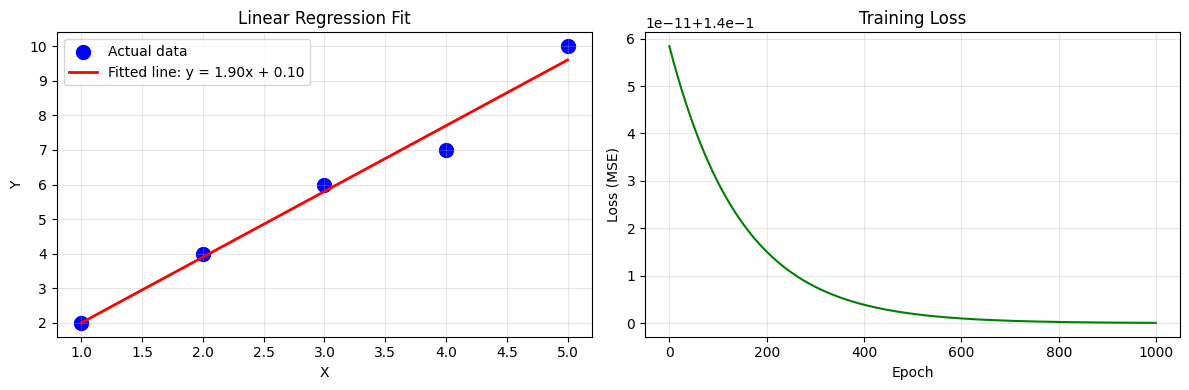

In [28]:
# Make predictions
y_pred = predict(x, w, c)

# Plot results
plt.figure(figsize=(12, 4))

# Plot 1: Data and fitted line
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Actual data', s=100)
plt.plot(x, y_pred, color='red', label=f'Fitted line: y = {w:.2f}x + {c:.2f}', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(loss_history, color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [29]:
# Calculate R-squared (coefficient of determination)
ss_res = np.sum((y - y_pred) ** 2)  # Sum of squares of residuals
ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
r2_score = 1 - (ss_res / ss_tot)

print(f"R-squared score: {r2_score:.4f}")
print(f"Mean Squared Error: {mse_loss(y, y_pred):.4f}")


R-squared score: 0.9810
Mean Squared Error: 0.1400
